In [178]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def load_motas_and_fps(results, root_dir, codecs, scales, det_intervals):
    motas = np.zeros((len(scales), len(codecs), 2, len(det_intervals))) # scales, codecs, vector_types, det_intervals
    fps_mean = np.zeros((len(scales), len(codecs), 2, len(det_intervals)))
    fps_std = np.zeros((len(scales), len(codecs), 2, len(det_intervals)))
    
    for result in results_baseline:
        path = result["path"]
        result["scale"]
        result["codec"]
        result["vector_type"]
        
        if result["codec"] == "h264":
            if result["tracker_type"] == "baseline":
                os.path.join(root_dir, "scale-{}".format(result["scale"]), result["codec"], "baseline", result["vector_type"], "iou-thres-0.1", "det-interval-{}".format(det_interval))

    for s, scale in enumerate(scales):
        for c, codec in enumerate(codecs):
            for d, det_interval in enumerate(det_intervals):
                if codec == "h264":
                    path_pb = os.path.join(root_dir, "scale-{}".format(scale), codec, "baseline", "p+b", "iou-thres-0.1", "det-interval-{}".format(det_interval))
                    path_p = os.path.join(root_dir, "scale-{}".format(scale), codec, "baseline", "p", "iou-thres-0.1", "det-interval-{}".format(det_interval))

                    # load MOTA
                    mot_metrics = pickle.load(open(os.path.join(path_pb, "mot_metrics.pkl"), "rb"))
                    motas[s, c, 0, d] = mot_metrics.loc['OVERALL', 'mota']
                    mot_metrics = pickle.load(open(os.path.join(path_p, "mot_metrics.pkl"), "rb"))
                    motas[s, c, 1, d] = mot_metrics.loc['OVERALL', 'mota']

                    # load FPS
                    fps_csv = pd.read_csv(os.path.join(path_pb, "time_perf.log"), delimiter=",")
                    fps_mean[s, c, 0, d] = fps_csv.iloc[-1, 0]
                    fps_std[s, c, 0, d] = fps_csv.iloc[-1, 1]
                    fps_csv = pd.read_csv(os.path.join(path_p, "time_perf.log"), delimiter=",")
                    fps_mean[s, c, 1, d] = fps_csv.iloc[-1, 0]
                    fps_std[s, c, 1, d] = fps_csv.iloc[-1, 1]

                if codec == "mpeg4":
                    path = os.path.join(root_dir, "scale-{}".format(scale), codec, "baseline", "iou-thres-0.1", "det-interval-{}".format(det_interval))

                    mot_metrics = pickle.load(open(os.path.join(path, "mot_metrics.pkl"), "rb"))
                    motas[s, c, 0, d] = mot_metrics.loc['OVERALL', 'mota']
                    fps_csv = pd.read_csv(os.path.join(path, "time_perf.log"), delimiter=",")
                    fps_mean[s, c, 0, d] = fps_csv.iloc[-1, 0]
                    fps_std[s, c, 0, d] = fps_csv.iloc[-1, 1]
    return motas, fps_mean, fps_std

In [180]:
root_dir = "../../eval_output/custom"

In [186]:
methods = ["baseline", "deep"]
codecs = ["mpeg4", "h264"]
scales = [0.25, 0.5, 0.75, 1.0]
det_intervals = [2, 4, 6, 8, 10, 15, 20]

results_baseline = [
    {"path": "scale-0.25/mpeg4/baseline/iou-thres-0.1", "scale": 0.25, "codec": "mpeg4", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": None},
    {"path": "scale-0.25/h264/baseline/p+b/iou-thres-0.1", "scale": 0.25, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p+b"},
    {"path": "scale-0.25/h264/baseline/p/iou-thres-0.1", "scale": 0.25, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p"},
    {"path": "scale-0.5/mpeg4/baseline/iou-thres-0.1", "scale": 0.5, "codec": "mpeg4", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": None},
    {"path": "scale-0.5/h264/baseline/p+b/iou-thres-0.1", "scale": 0.5, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p+b"},
    {"path": "scale-0.5/h264/baseline/p/iou-thres-0.1", "scale": 0.5, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p"},
    {"path": "scale-0.75/mpeg4/baseline/iou-thres-0.1", "scale": 0.75, "codec": "mpeg4", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": None},
    {"path": "scale-0.75/h264/baseline/p+b/iou-thres-0.1", "scale": 0.75, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p+b"},
    {"path": "scale-0.75/h264/baseline/p/iou-thres-0.1", "scale": 0.75, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p"},
    {"path": "scale-1.0/mpeg4/baseline/iou-thres-0.1", "scale": 1.0, "codec": "mpeg4", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": None},
    {"path": "scale-1.0/h264/baseline/p+b/iou-thres-0.1", "scale": 1.0, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p+b"},
    {"path": "scale-1.0/h264/baseline/p/iou-thres-0.1", "scale": 1.0, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p"},
]

results_deep = [
    {"path": "scale-0.25/mpeg4/baseline/iou-thres-0.1", "scale": 0.25, "codec": "mpeg4", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": None},
    {"path": "scale-0.25/h264/baseline/p+b/iou-thres-0.1", "scale": 0.25, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p+b"},
    {"path": "scale-0.25/h264/baseline/p/iou-thres-0.1", "scale": 0.25, "codec": "h264", "tracker_type": "baseline", "tracker_iou_thres": 0.1, "vector_type": "p"},
]

motas_baseline, fps_mean_baseline, fps_std_baseline = load_motas_and_fps(results_baseline, root_dir, codecs, scales, det_intervals)
motas_deep, fps_mean_deep, fps_std_deep = load_motas_and_fps(results_deep, root_dir, codecs, scales, det_intervals)

# merge in axis 0
motas = np.stack((motas_baseline, motas_deep), axis=0)
fps_mean = np.stack((fps_mean_baseline, fps_mean_deep), axis=0)
fps_std = np.stack((fps_std_baseline, fps_std_deep), axis=0)

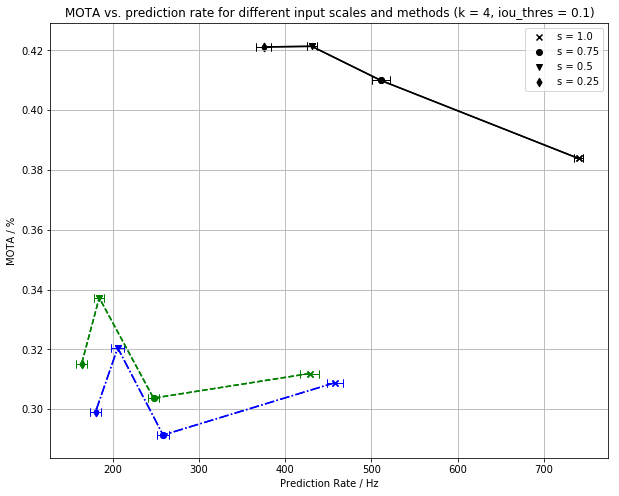

In [185]:
detector_interval = 4
det_index = det_intervals.index(detector_interval)

colors = ["k", "g", "b"]
linestyles = ["-","--","-."]
markers = ["x", "o", "v", "d"]

f, ax = plt.subplots(1, 1, figsize=(10, 8))

for method in range(motas.shape[0]):
    c = 0
    for codec in range(motas.shape[2]):
        for vtype in range(motas.shape[3]):

            # skip p+b vectors for MPEG4
            if codec == 0 and vtype == 1:
                continue

            for s, scale in enumerate(scales):
                ax.scatter(fps_mean[method, s, codec, vtype, det_index], motas[method, s, codec, vtype, det_index], marker=markers[s], color=colors[c])
                
            ax.errorbar(fps_mean[method, :, codec, vtype, det_index], motas[method, :, codec, vtype, det_index], xerr=fps_std[method, :, codec, vtype, det_index], yerr=None, fmt=linestyles[c], capsize=4, color=colors[c], elinewidth=1)
            c += 1

ax.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"])

#codec = 0  # MPEG4
#vtype = 0  # P
#ax.errorbar(fps_mean[method, :, codec, vtype, det_index], motas[method, :, codec, vtype, det_index], xerr=fps_std[method, :, codec, vtype, det_index], yerr=None, fmt="-", capsize=4, color="k", elinewidth=1)
#codec = 1  # H264
#vtype = 0  # P
#ax.errorbar(fps_mean[method, :, codec, vtype, det_index], motas[method, :, codec, vtype, det_index], xerr=fps_std[method, :, codec, vtype, det_index], yerr=None, fmt="--", capsize=4, color="g", elinewidth=1)
#codec = 1  # H264
#vtype = 1  # P+B
#ax.errorbar(fps_mean[method, :, codec, vtype, det_index], motas[method, :, codec, vtype, det_index], xerr=fps_std[method, :, codec, vtype, det_index], yerr=None, fmt="-.", capsize=4, color="b", elinewidth=1)

ax.set_xlabel("Prediction Rate / Hz")
ax.set_ylabel("MOTA / %")
ax.set_title("MOTA vs. prediction rate for different input scales and methods (k = 4, iou_thres = 0.1)")


ax.grid()
plt.show()

In [131]:
fps = fps_mean_baseline
motas = motas_baseline

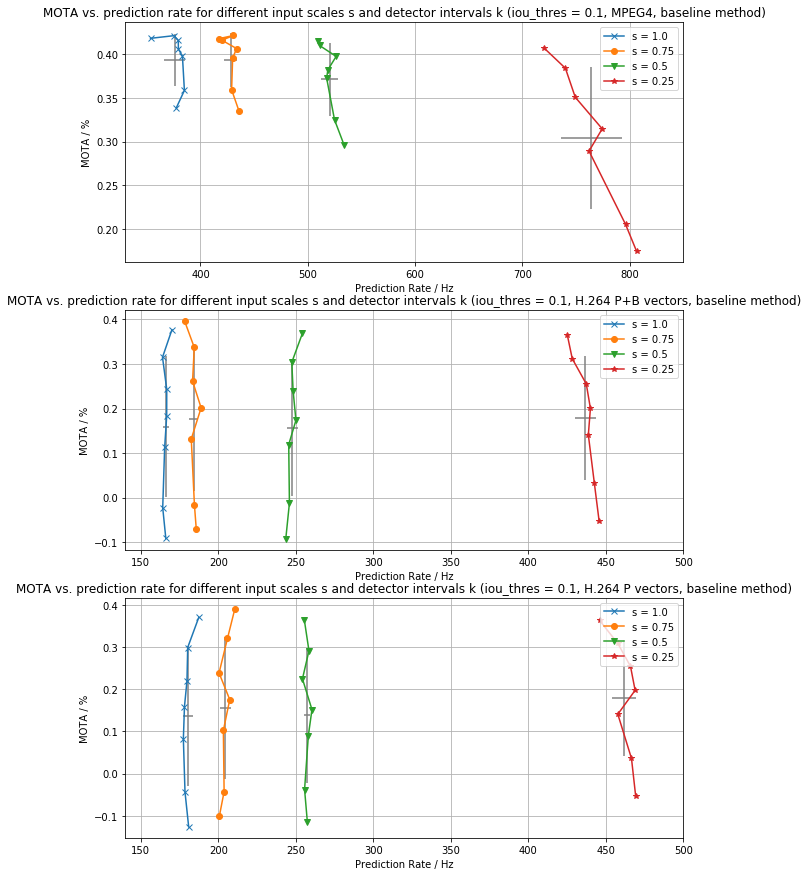

In [132]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
codec = 0  # MPEG4
ax1.plot(fps[3, codec, 0, :], motas[3, codec, 0, :], marker="x")
ax1.errorbar(np.mean(fps[3, codec, 0, :]), np.mean(motas[3, codec, 0, :]), xerr=np.std(fps[3, codec, 0, :]), yerr=np.std(motas[3, codec, 0, :]), fmt="", color="gray")
ax1.plot(fps[2, codec, 0, :], motas[2, codec, 0, :], marker="o")
ax1.errorbar(np.mean(fps[2, codec, 0, :]), np.mean(motas[2, codec, 0, :]), xerr=np.std(fps[2, codec, 0, :]), yerr=np.std(motas[2, codec, 0, :]), fmt="", color="gray")
ax1.plot(fps[1, codec, 0, :], motas[1, codec, 0, :], marker="v")
ax1.errorbar(np.mean(fps[1, codec, 0, :]), np.mean(motas[1, codec, 0, :]), xerr=np.std(fps[1, codec, 0, :]), yerr=np.std(motas[1, codec, 0, :]), fmt="", color="gray")
ax1.plot(fps[0, codec, 0, :], motas[0, codec, 0, :], marker="*")
ax1.errorbar(np.mean(fps[0, codec, 0, :]), np.mean(motas[0, codec, 0, :]), xerr=np.std(fps[0, codec, 0, :]), yerr=np.std(motas[0, codec, 0, :]), fmt="", color="gray")
ax1.set_xlim([330, 850])
ax1.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"])
ax1.set_xlabel("Prediction Rate / Hz")
ax1.set_ylabel("MOTA / %")
ax1.set_title("MOTA vs. prediction rate for different input scales s and detector intervals k (iou_thres = 0.1, MPEG4, baseline method)")
ax1.grid()

codec = 1  # H.264
vector_type = 0 # pb
ax2.plot(fps[3, codec, vector_type, :], motas[3, codec, vector_type, :], marker="x")
ax2.errorbar(np.mean(fps[3, codec, vector_type, :]), np.mean(motas[3, codec, vector_type, :]), xerr=np.std(fps[3, codec, vector_type, :]), yerr=np.std(motas[3, codec, vector_type, :]), fmt="", color="gray")
ax2.plot(fps[2, codec, vector_type, :], motas[2, codec, vector_type, :], marker="o")
ax2.errorbar(np.mean(fps[2, codec, vector_type, :]), np.mean(motas[2, codec, vector_type, :]), xerr=np.std(fps[2, codec, vector_type, :]), yerr=np.std(motas[2, codec, vector_type, :]), fmt="", color="gray")
ax2.plot(fps[1, codec, vector_type, :], motas[1, codec, vector_type, :], marker="v")
ax2.errorbar(np.mean(fps[1, codec, vector_type, :]), np.mean(motas[1, codec, vector_type, :]), xerr=np.std(fps[1, codec, vector_type, :]), yerr=np.std(motas[1, codec, vector_type, :]), fmt="", color="gray")
ax2.plot(fps[0, codec, vector_type, :], motas[0, codec, vector_type, :], marker="*")
ax2.errorbar(np.mean(fps[0, codec, vector_type, :]), np.mean(motas[0, codec, vector_type, :]), xerr=np.std(fps[0, codec, vector_type, :]), yerr=np.std(motas[0, codec, vector_type, :]), fmt="", color="gray")
ax2.set_xlim([140, 500])
ax2.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"], loc="upper right")
ax2.set_xlabel("Prediction Rate / Hz")
ax2.set_ylabel("MOTA / %")
ax2.set_title("MOTA vs. prediction rate for different input scales s and detector intervals k (iou_thres = 0.1, H.264 P+B vectors, baseline method)")
ax2.grid()

codec = 1  # H.264
vector_type = 1 # p
ax3.plot(fps[3, codec, vector_type, :], motas[3, codec, vector_type, :], marker="x")
ax3.errorbar(np.mean(fps[3, codec, vector_type, :]), np.mean(motas[3, codec, vector_type, :]), xerr=np.std(fps[3, codec, vector_type, :]), yerr=np.std(motas[3, codec, vector_type, :]), fmt="", color="gray")
ax3.plot(fps[2, codec, vector_type, :], motas[2, codec, vector_type, :], marker="o")
ax3.errorbar(np.mean(fps[2, codec, vector_type, :]), np.mean(motas[2, codec, vector_type, :]), xerr=np.std(fps[2, codec, vector_type, :]), yerr=np.std(motas[2, codec, vector_type, :]), fmt="", color="gray")
ax3.plot(fps[1, codec, vector_type, :], motas[1, codec, vector_type, :], marker="v")
ax3.errorbar(np.mean(fps[1, codec, vector_type, :]), np.mean(motas[1, codec, vector_type, :]), xerr=np.std(fps[1, codec, vector_type, :]), yerr=np.std(motas[1, codec, vector_type, :]), fmt="", color="gray")
ax3.plot(fps[0, codec, vector_type, :], motas[0, codec, vector_type, :], marker="*")
ax3.errorbar(np.mean(fps[0, codec, vector_type, :]), np.mean(motas[0, codec, vector_type, :]), xerr=np.std(fps[0, codec, vector_type, :]), yerr=np.std(motas[0, codec, vector_type, :]), fmt="", color="gray")
ax3.set_xlim([140, 500])
ax3.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"], loc="upper right")
ax3.set_xlabel("Prediction Rate / Hz")
ax3.set_ylabel("MOTA / %")
ax3.set_title("MOTA vs. prediction rate for different input scales s and detector intervals k (iou_thres = 0.1, H.264 P vectors, baseline method)")
ax3.grid()
plt.show()

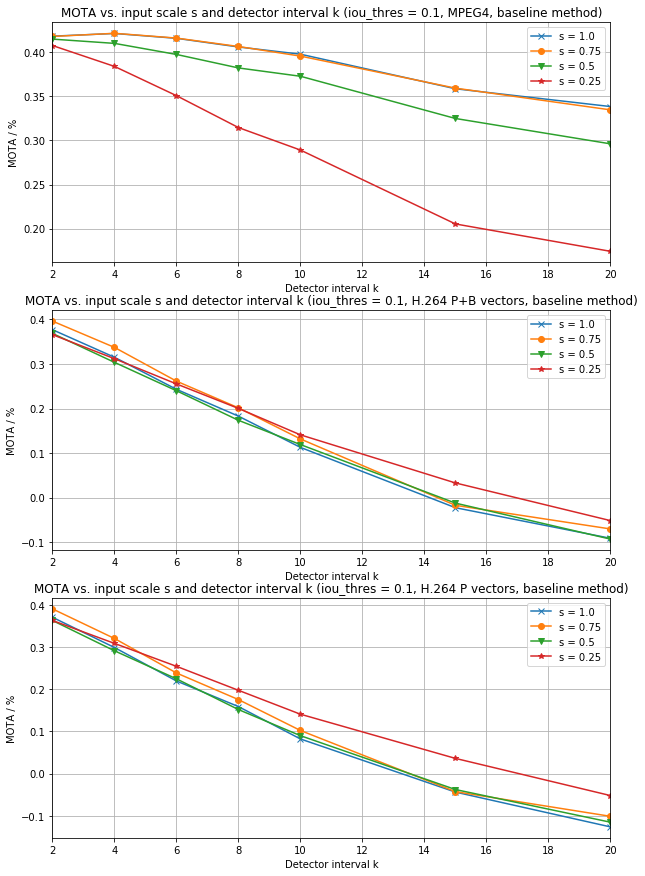

In [130]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))
codec = 0
vector_type = 0
ax1.plot(det_intervals, motas[3, codec, vector_type, :], marker="x")
ax1.plot(det_intervals, motas[2, codec, vector_type, :], marker="o")
ax1.plot(det_intervals, motas[1, codec, vector_type, :], marker="v")
ax1.plot(det_intervals, motas[0, codec, vector_type, :], marker="*")
ax1.set_xlim([2, 20])
ax1.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"])
ax1.set_xlabel("Detector interval k")
ax1.set_ylabel("MOTA / %")
ax1.set_title("MOTA vs. input scale s and detector interval k (iou_thres = 0.1, MPEG4, baseline method)")
ax1.grid()

codec = 1
vector_type = 0
ax2.plot(det_intervals, motas[3, codec, vector_type, :], marker="x")
ax2.plot(det_intervals, motas[2, codec, vector_type, :], marker="o")
ax2.plot(det_intervals, motas[1, codec, vector_type, :], marker="v")
ax2.plot(det_intervals, motas[0, codec, vector_type, :], marker="*")
ax2.set_xlim([2, 20])
ax2.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"])
ax2.set_xlabel("Detector interval k")
ax2.set_ylabel("MOTA / %")
ax2.set_title("MOTA vs. input scale s and detector interval k (iou_thres = 0.1, H.264 P+B vectors, baseline method)")
ax2.grid()

codec = 1
vector_type = 1
ax3.plot(det_intervals, motas[3, codec, vector_type, :], marker="x")
ax3.plot(det_intervals, motas[2, codec, vector_type, :], marker="o")
ax3.plot(det_intervals, motas[1, codec, vector_type, :], marker="v")
ax3.plot(det_intervals, motas[0, codec, vector_type, :], marker="*")
ax3.set_xlim([2, 20])
ax3.legend(["s = 1.0", "s = 0.75", "s = 0.5", "s = 0.25"])
ax3.set_xlabel("Detector interval k")
ax3.set_ylabel("MOTA / %")
ax3.set_title("MOTA vs. input scale s and detector interval k (iou_thres = 0.1, H.264 P vectors, baseline method)")
ax3.grid()
plt.show()